In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
np.random.seed(42)

m: int = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

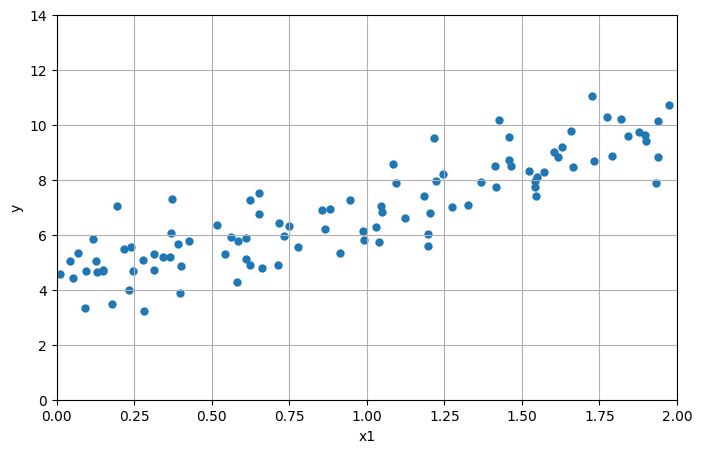

In [4]:
plt.figure(figsize=(8, 5))
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.axis((0, 2, 0, 14))
plt.scatter(X, y, linewidths=0)
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

**Note that there 0 -> x0(c) and 1 -> x1(m) and `add_dummy_feature` adds at index 0 in each row in column**
<br />
**y = a + bx**

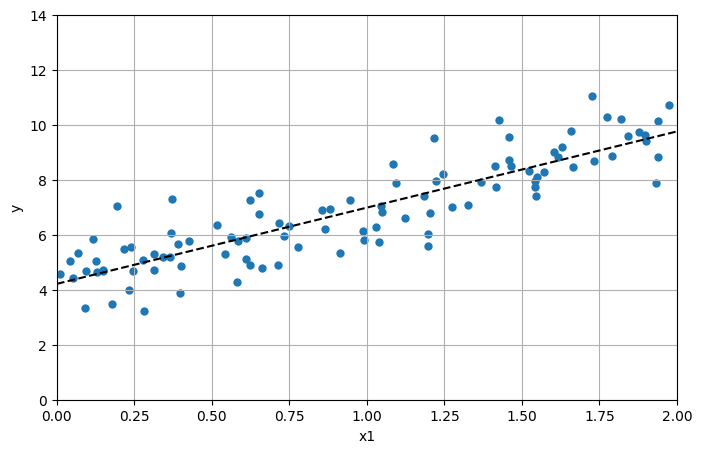

In [6]:
x_best = np.linspace(0, 2, 10)
y_best = theta_best[0] + theta_best[1] * x_best

plt.figure(figsize=(8, 5))
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.axis((0, 2, 0, 14))
plt.scatter(X, y, linewidths=0)
plt.plot(x_best, y_best, "k--")
plt.show()

In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new, 1)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

### Implementing Batch Gradient Descent

In [8]:
eta = 0.1
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)

for i in range(n_epochs):
    grad = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * grad

theta

array([[4.21509616],
       [2.77011339]])

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, max_iter=1000, tol=1e-5, eta0=0.01, n_iter_no_change=100, learning_rate="adaptive")
sgd_reg.fit(X, y.ravel())

SGDRegressor(learning_rate='adaptive', n_iter_no_change=100, penalty=None,
             tol=1e-05)

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21465534]), array([2.77047464]))

## Polynomial Featuresb

In [11]:
np.random.seed(42)
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly ** 2 + X_poly + 2 + np.random.randn(m, 1)

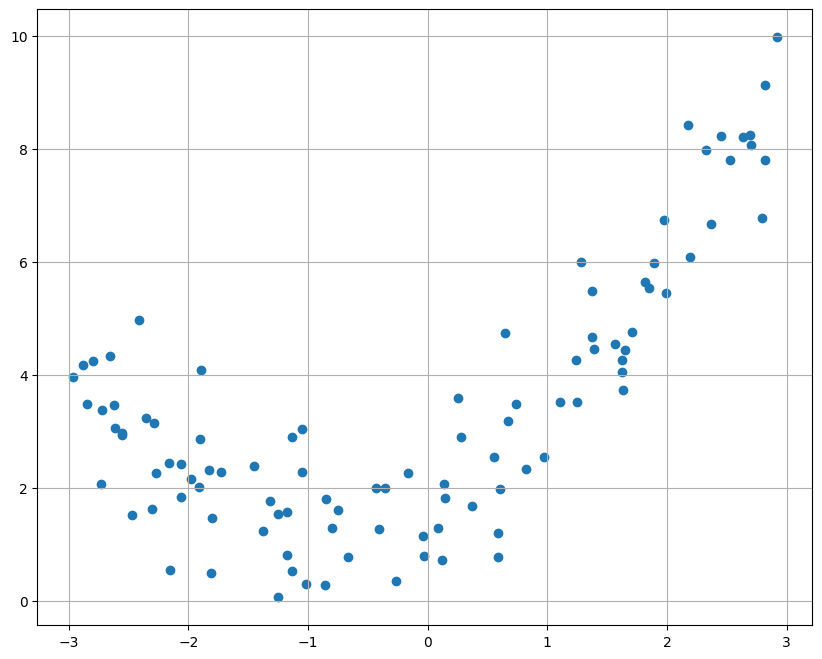

In [12]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(X_poly, y_poly)
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features.fit_transform(X_poly)

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_poly_2, y_poly)

LinearRegression(n_jobs=-1)

In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [16]:
X_poly_plot = np.linspace(-3, 3, num=30).reshape(-1, 1)
X_poly_plot = poly_features.transform(X_poly_plot)
y_poly_plot = lin_reg.predict(X_poly_plot)

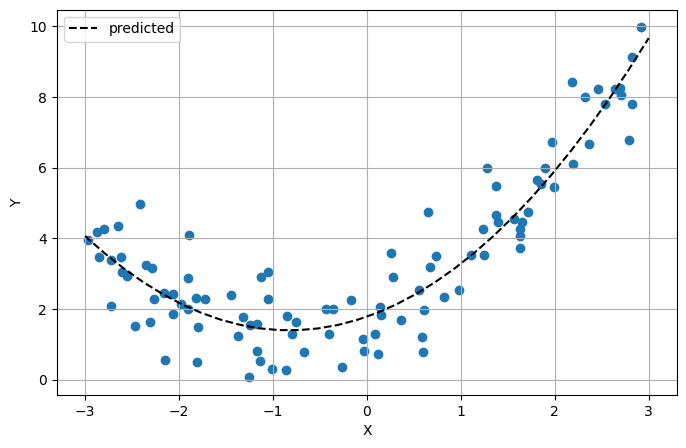

In [17]:
plt.figure(figsize=(8, 5))
plt.grid()
plt.scatter(X_poly, y_poly)
plt.plot(X_poly_plot[:, 0], y_poly_plot, "k--", label="predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Learning Curve

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

train_size, train_scores, test_scores = learning_curve(LinearRegression(), X_poly, y_poly, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 40))

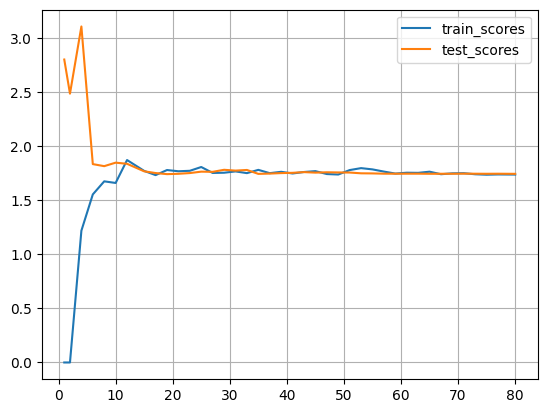

In [19]:
plt.plot(train_size, -train_scores.mean(axis=1), label="train_scores")
plt.plot(train_size, -test_scores.mean(axis=1), label="test_scores")
plt.legend()
plt.grid()
plt.show()

### Logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X_train, y_train = make_classification()
reg = LogisticRegression(penalty="elasticnet", l1_ratio=0.5, solver="saga", max_iter=1000)

reg.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

### Decision Boundary

In [191]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

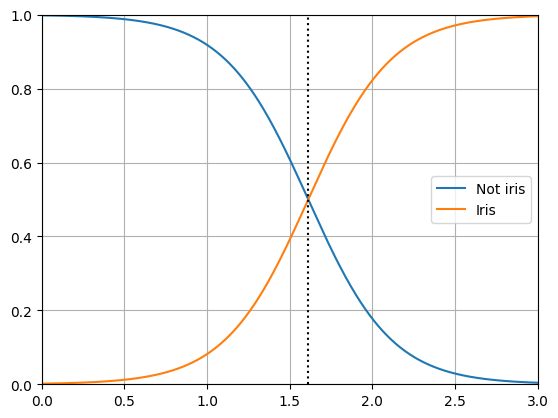

In [193]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], label="Not iris")
plt.plot(X_new, y_proba[:, 1], label="Iris")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:")
plt.axis((0, 3, 0, 1))
plt.grid()
plt.legend()
plt.show()

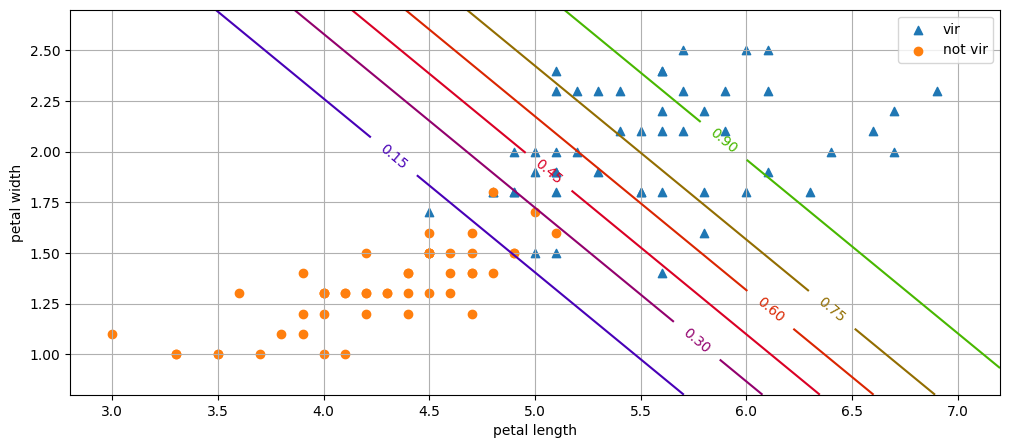

In [257]:
# taking 2 features - Petal width, petal length

X_train = iris.data[["petal width (cm)", "petal length (cm)"]]
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train.values, y)
plt.figure(figsize=(12, 5))

is_not_vir = X_train.iloc[np.where(1 - y)[0]]
is_vir = X_train.iloc[np.where(y)[0]]

plt.scatter(is_vir["petal length (cm)"], is_iris["petal width (cm)"], marker="^", label="vir")
plt.scatter(is_not_vir["petal length (cm)"], is_not_iris["petal width (cm)"], label="not vir")

pet_len = np.linspace(2.8, 7.2, 500).reshape(-1, 1)
pet_wid = np.linspace(0.8, 2.7, 500).reshape(-1, 1)
x0, x1 = np.meshgrid(pet_len, pet_wid)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

contour = plt.contour(x0, x1, y_proba[:, 1].reshape(x0.shape), cmap=plt.cm.brg)
plt.clabel(contour, inline=1)


plt.axis((2.8, 7.2, 0.8 ,2.7))
plt.grid()
plt.legend()
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()
